In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('seaborn')

In [36]:
users = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [34]:
print (len(anime))
print (anime.rating)
anime.head()

3787
1        9.26
2        9.25
3        9.17
4        9.16
5        9.15
6        9.13
9        9.11
10       9.06
12       9.04
13       8.98
14       8.93
16       8.92
17       8.88
19       8.83
20       8.83
22       8.82
23       8.82
26       8.80
27       8.80
28       8.78
29       8.78
30       8.77
31       8.76
32       8.75
34       8.75
36       8.73
38       8.72
39       8.71
40       8.71
42       8.68
         ... 
11064     NaN
11065     NaN
11066     NaN
11067     NaN
11068     NaN
11069     NaN
11071     NaN
11072     NaN
11073     NaN
11074     NaN
11076     NaN
11077     NaN
11078     NaN
11079     NaN
11080     NaN
11081     NaN
11084     NaN
11085     NaN
11088     NaN
11089     NaN
11090     NaN
11096     NaN
11097     NaN
11099     NaN
11102     NaN
11104     NaN
11106     NaN
11107     NaN
11110     NaN
11111     NaN
Name: rating, dtype: float64


,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351


In [10]:
print (len(users))
users.head()


7813737


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


So we have two pandas data frames. In the first, we have information regarding a particular anime. The information here speaks for itself. In the second data frame, we have the actual ratings for a given user/ anime pair. Ratings range from 1 to 10, with -1 signifying a completed but unrated movie.

We can see there are 12294 total anime and 7.8 million user/ rating pairs. The first thing we want to do is remove all ratings that are "-1" as they don't provide us useful information on ratings. There are also some anime with NaNs for scores. We'll want to remove those, but let's wait a second on that.

In [37]:
users.drop(users[users.rating == -1].index, inplace=True)

print (len(users))
users.head()

6337241


,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


Neat. We trimmed down about 1.5 million data points. But that's still too many. Let's, for the purposes of this analysis, focus only on TV shows. We're going to need a list of anime_ids corresponding to non-TV shows. Let's kill two birds with one stone and include anime that have null ratings for whatever reason.

In [43]:
bad_ids = anime.anime_id[(anime.type != 'TV') | (anime.rating.isnull())]
users.drop(users[users.anime_id.map(lambda x: x in bad_ids)].index, inplace=True)
anime.drop(anime[(anime.type != 'TV') | (anime.rating.isnull())].index, inplace=True)

print(len(users))
print(len(anime))

3594754
3671


Neat. We cut down to 3.6 million user/anime pairs, with 3671 unique TV titles. Note that we cut down about 75% of anime entries, yet the number of user/anime pairs cut down by less than 50%. Those titles (movies, specials, OVAs) obviously had less interest, so our resulting data is denser. That's good for our recommender systems. 

We'll want to wrap this code in a pre-processing function in a package down the line, but for this exploratory analysis, I'll leave it as such.

Let's visualize the data. Let's do some basic stuff first.

mean: 6.902299; median: 6.940000


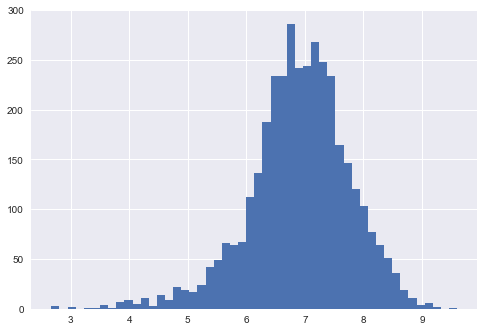

In [55]:
anime.rating.hist(bins=50)
print ("mean: %f; median: %f" % (anime.rating.mean(axis=0), anime.rating.median(axis=0)))

The data is skewed left, but not significantly so. The mean and median are very close to each other, at about 6.9. We also see spikes at the bins corresponding to [6.8, 6.9) and [7.1, 7.2). 